# 🐕 leetcode

## 🐕leetcode有效的括号  
题目描述：给定一个只包括 '('，')'，'{'，'}'，'['，']' 的字符串 s ，判断字符串是否有效。

有效字符串需满足：

1、左括号必须用相同类型的右括号闭合  
2、左括号必须以正确的顺序闭合  
3、每个右括号都有一个对应的相同类型的左括号。
 

示例 1：

输入：s = "()"   
输出：true  
示例 2：  

输入：s = "()[]{}"  
输出：true  
示例 3：  

输入：s = "(]"   
输出：false  

**算法思路**：括号必须都是成算对出现，那么也就是说将字符2等分就可以看到**应该有几对括号**然后我们可以去对每队括号进行判断是否符合要求  

In [50]:
def isValid(s):
    nums = int(len(s)/2) #得到括号的个数
    i = 0
    while (int(len(s)) - i >=2):
        if s[i:i+2][0] == '(' and s[i:i+2][1] != ')':
            return False
        elif s[i:i+2][0] == '[' and s[i:i+2][1] != ']':
            return False   
        elif s[i:i+2][0] == '{' and s[i:i+2][1] != '}':
            return False
        i = i+2  
    return True

上述算法思路存在问题：即在使用例子‘{[]}’ 输出结果应该为True而结果却是False  
**错因分析**：括号开口也就是说即使相邻的括号不相同但是开口方向相同依旧要继续判断，不可以直接说就是False  
**算法纠正**：利用栈进行解决，首先依次进栈---判断开口是否相同/对应方向---同则继续进栈，否则错误

In [58]:
def isValid(s):
    dic = {'{': '}',  '[': ']', '(': ')', '?': '?'}
    stack = ['?'] #添加？为了pop时不会出现空的错误
    for c in s:
        if c in dic: stack.append(c)
        elif dic[stack.pop()] != c: return False 
    return len(stack) == 1

In [60]:
s0 = "(]"
s1 = "()[]{}"
s2 = "{}()[)"
isValid(s1)

True

## 🐕LCS02 完成一半题目  
有 N 位扣友参加了微软与力扣举办了「以扣会友」线下活动。主办方提供了 2*N 道题目，整型数组questions中每个数字对应了每道题目所涉及的知识点类型。若每位扣友选择不同的一题,请返回被选的 N 道题目至少包含多少种知识点类型。

示例 1： 

输入：questions = [2,1,6,2]

输出：1

解释：有2位扣友在4道题目中选择2题。可选择完成知识点类型为2的题目时，此时仅一种知识点类型因此至少包含1种知识点类型。

示例 2：

输入：questions = [1,5,1,3,4,5,2,5,3,3,8,6]

输出：2

解释：有 6 位扣友在 12 道题目中选择题目，需要选择6题。选择完成知识点类型为3、5的题目,因此至少包含2种知识点类型  
**题目思路**：给定一个数组，统计题目数量最多的题目，然后看看这些数量能不能满足人数要求，如若不可以那么再加入一个题目  

In [124]:
def halfQuestions(questions):
    dict = {}
    people_num = len(questions)/2
    #统计好题目数量
    for i in questions:
        if i not in dict:
            dict[i] = 1
        else:
            dict[i] = dict[i] + 1
    #将题目数量对每个人进行分配，并且计算好题目的类型
    p = 0 #初始类型为0
    j = 0
    map_order = sorted(dict.items(), key=lambda x: x[1], reverse=True)  #将字典进行排序
    # return map_order
    while people_num > 0:
        if map_order[j][1] <= people_num:
            people_num = people_num - map_order[j][1]
            j = j+1
            p = p+1
        else:
            people_num = 0
            p = p +1
            break
    return p
    # return max(dict.values())


In [125]:
questions1 = [1,5,1,3,4,5,2,5,3,3,8,6]
questions2 = [8,11,6,10]
questions3 = [13,8,3,7,5,6,11,12,3,6,6,11]
halfQuestions(questions3)

3

## 🐕 27. 移除元素 
给你一个数组 nums 和一个值 val，你需要原地移除所有数值等于val的元素，并返回移除后数组的新长度，不要使用额外的数组空间，你必须仅使用 O(1) 额外空间并原地修改输入数组。元素的顺序可以改变。你不需要考虑数组中超出新长度后面的元素。

示例 1：  

输入：nums = [3,2,2,3], val = 3  
输出：2, nums = [2,2]  
解释：函数应该返回新的长度 2, 并且 nums 中的前两个元素均为 2。你不需要考虑数组中超出新长度后面的元素。例如，函数返回的新长度为 2 ，而 nums = [2,2,3,3] 或 nums = [2,2,0,0]，也会被视作正确答案。  
示例 2：  

输入：nums = [0,1,2,2,3,0,4,2], val = 2  
输出：5, nums = [0,1,4,0,3]  
解释：函数应该返回新的长度 5, 并且 nums 中的前五个元素为 0, 1, 3, 0, 4。注意这五个元素可为任意顺序。你不需要考虑数组中超出新长度后面的元素。   
**思路**：建立两个指针，一个指向数组头，一个指向尾。遍历数组在遇到对于目的值的时候就直接将目的值丢到数组尾部，而后切片即可

In [22]:
def removeElement(nums, val):
    i, j = 0, len(nums)-1
    if nums == None or len(nums) == 0: return 0
    while i < j:
        if i<j and nums[i] !=val:
            i = i+1
        elif i<j and nums[j] == val:
            j = j-1
        nums[i], nums[j] = nums[j], nums[i]
    return j, nums[0:j]

In [23]:
nums = [0,1,2,2,3,0,4,2]
val = 2
removeElement(nums, val)

(5, [0, 1, 4, 0, 3])

## 🐕28. 找出字符串中第一个匹配项的下标  
给你两个字符串 haystack 和 needle，请你在 haystack 字符串中找出needle字符串的第一个匹配项的下标（下标从 0 开始）。如果 needle 不是 haystack 的一部分，则返回 -1 。  
示例 1：  

输入：haystack = "sadbutsad", needle = "sad"  
输出：0  
解释："sad" 在下标 0 和 6 处匹配。  
第一个匹配项的下标是 0 ，所以返回 0 。  
示例 2：  

输入：haystack = "leetcode", needle = "leeto"  
输出：-1  
解释："leeto" 没有在 "leetcode" 中出现，所以返回-1。  
**解题思路**：直接暴力切片查找即可

In [52]:
def strStr(haystack, needle):
    a, b = len(haystack), len(needle)
    for i in range(0, a-b+1):
        if haystack[i:i+b] == needle:
            return i
    return -1

In [53]:
strStr('sadbutsad', 'sad')
#strStr('leetcode', 'leeto')

0

# 🗡剑指offer

## 🗡剑指 Offer 10- I. 斐波那契数列    
写一个函数,输入n,求斐波那契(Fibonacci)数列的第n项(即F(N))  
斐波那契数列的定义如下：F(0) = 0,F(1) = 1;F(N) = F(N - 1) + F(N - 2), 其中 N > 1.斐波那契数列由 0 和 1 开始，之后的斐波那契数就是由之前的两数相加而得出。

示例 1：  
输入：n = 2  
输出：1  

示例 2：  
输入：n = 5  
输出：5 <0,1,1,2,3,5>  
**解题思路**：先生成斐波那契数列而后到斐波那契数列中找到符合要求的n

In [75]:
def fib(n):
    i= 0
    a = [0,1]
    while i<= n-1:
        nums = a[i] + a[i+1]
        a.append(nums)
        i = i+1
    return a[n]

## 🗡剑指 Offer 03. 数组中重复的数字  
找出数组中重复的数字。  
在一个长度为 n 的数组 nums 里的所有数字都在 0～n-1 的范围内。数组中某些数字是重复的，但不知道有几个数字重复了，也不知道每个数字重复了几次。请找出数组中任意一个重复的数字  

示例 1：

输入：  
[2, 3, 1, 0, 2, 5, 3]  
输出：2 或 3   

**解题思路**：直接创建哈希表记录数字出现的次数，而后直接返回数字次数>1的数字即可

In [104]:
def findRepeatNumber(nums):
    dic = {}
    a = []
    for i in nums:
        if i not in dic:dic[i] = 1
        else:dic[i] = dic[i]+1
    a= [k for k, v in dic.items() if v>1]
    return a

In [107]:
b= [2, 3, 1, 0, 2, 5, 3]
a = findRepeatNumber(b)

## 🗡剑指 Offer 04. 二维数组中的查找  
在一个n*m的二维数组中,每一行都按照从**左到右非递减的顺序排序**,每一列都按照从**上到下非递减的顺序排序**.请完成一个高效的函数,输入这样的一个二维数组和一个整数，判断数组中是否含有该整数。

示例:

现有矩阵 matrix 如下：

[  
  [1,   4,  7, 11, 15],  
  [2,   5,  8, 12, 19],  
  [3,   6,  9, 16, 22],  
  [10, 13, 14, 17, 24],  
  [18, 21, 23, 26, 30]  
]  

给定 target = 5，返回 true。

给定 target = 20，返回 false。

### 解法一：暴力查找法

In [3]:
def findNumberIn2DArray1(matrix, target):
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j] == target:return True
    return False

### 解法二----->利用数组有顺序的特点进行解决  
将数组旋转从左下角第一个元素开始进行查找

In [6]:
def findNumberIn2DArray2(matrix, target):
    i, j = len(matrix)-1, 0
    while i>0 or j< len(matrix[0]):
        if matrix[i][j] < target: j = j+1
        elif matrix[i][j] > target: i = i-1
        elif matrix[i][j] == target: return True
    return False

In [7]:
matrix=[  
  [1,   4,  7, 11, 15],  
  [2,   5,  8, 12, 19],  
  [3,   6,  9, 16, 22],  
  [10, 13, 14, 17, 24],  
  [18, 21, 23, 26, 30]  
]
findNumberIn2DArray1(matrix, 20)
findNumberIn2DArray2(matrix, 30)

True

## 🗡剑指 Offer 10- II. 青蛙跳台阶问题  
一只青蛙一次可以跳上1级台阶，也可以跳上2级台阶。求该青蛙跳上一个n级的台阶总共有多少种跳法   
>答案需要取模 1e9+7（1000000007），如计算初始结果为：1000000008，请返回 1。

示例 1：  
输入：n = 2   
输出：2  

示例 2：  
输入：n = 7  
输出：21  

示例 3：  
输入：n = 0  
输出：1  
**解题思路**：  
**思路一**：类似与计算$z=x+2y$计算符合要求的x,y的个数  
---->错误：他不一定按照先走1而后2的次序，它可以**无序跳跃**也就是说1 2随便次序只要满足等于n即可  
**思路二**  

In [51]:
def numWays1(n):
    number = 1
    for i in range(n+1):
        for j in range(n//2):
            if i+2*j == n:
                number = number + 1
    return number% 1000000007

def numWays2(n):
    if n== 0 or n == 1:
        return 1
    else:
        numWays2(n-1) + numWays2(n-2)

## 🗡剑指 Offer 12. 矩阵中的路径  
给定一个mxn二维字符网格board和一个字符串单词word.如果 word 存在于网格中,返回true否则,返回false
单词必须按照字母顺序，**通过相邻的单元格内的字母构成**，其中“相邻”单元格是那些水平相邻或垂直相邻的单元格。同一个单元格内的字母不允许被重复使用。

例如,在下面的3×4的矩阵中包含单词 "ABCCED"(单词中的字母已标出)

![image.png](https://assets.leetcode.com/uploads/2020/11/04/word2.jpg)

**解题思路**：遍历算法找到符合要求的字母

In [ ]:
def exist(board, word):
    store[] #存储已经访问的点的位置
    i, j = 0, 0
    k = 0
    while len(stack) == len(word):
        

In [2]:
board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]]
word = "ABCCED"

In [4]:
len(word)

6

## 🗡剑指 Offer 63. 股票的最大利润  
假设把某股票的价格按照时间先后顺序存储在数组中，请问买卖该股票一次可能获得的最大利润是多少？

示例 1:  

输入: [7,1,5,3,6,4]  
输出: 5  
解释: 在第 2 天(股票价格=1)的时候买入,在第5天(股票价格 = 6)的时候卖出,最大利润=6-1=5注意利润不能是 7-1 = 6, 因为卖出价格需要大于买入价格。  

示例 2:  

输入: [7,6,4,3,1]  
输出: 0  
解释: 在这种情况下,没有交易完成,所以最大利润为0。  

**解法**：直接计算第i天之后的每一天与第i天的价格差就可以得利润  
--->缺点：时间复杂度太高了，如果prices长度过长，算法运行的时间效率也就越低  
**改进措施**：由于两次循环时间过长，而且简单分析很容易知道：如果**第i天**的价格高于**第i-1天**那么我们就没有必要再去计算**第i天**利润，因为肯定低于**第i-天**，所以我们选择的改进措施就是直接比较：相邻两天价格差和maxp的大小，而后再去比较相邻两条价格高低保留低价

In [10]:
def maxProfit1(prices):
    maxp = 0
    for i in range(len(prices)):
        for j in range(i, len(prices)):
            if prices[j] - prices[i] > maxp:
                maxp = prices[j] - prices[i]
    return maxp

In [11]:
maxProfit1([7,1,5,3,6,4])

5

In [39]:
def maxProfit2(prices):
    maxp = 0
    for i in range(1,len(prices)):
        maxp = max(maxp, prices[i] - prices[i-1])
        if prices[i] > prices[i-1]: 
            prices[i] = prices[i-1]
    return maxp

In [40]:
maxProfit2([7,1,5,3,6,4])

5

## 🗡剑指 Offer 42. 连续子数组的最大和  
输入一个整型数组，数组中的一个或连续多个整数组成一个子数组。求所有子数组的和的最大值  
要求：**时间复杂度为O(n)**
 
示例1:  
输入: nums = [-2,1,-3,4,-1,2,1,-5,4]  
输出: 6  
解释: 连续子数组[4,-1,2,1]的和最大,为6  
**解题思路**：直接计算i项与i-1项与0的最大值，这样我们就可以保证到i项时，就已经是(i项)最大值了

In [49]:
def maxSubArray0(nums):
    for i in range(1, len(nums)):
        nums[i] = nums[i] + max(nums[i-1], 0)
    return max(nums)

In [51]:
nums = [-2,1,-3,4,-1,2,1,-5,4]
maxSubArray0(nums)

6

## 🗡剑指 Offer 62. 圆圈中最后剩下的数  
0,1,···,n-1这n个数字排成一个圆圈，从数字0开始，每次从这个圆圈里删除第m个数字(删除后从下一个数字开始计数),求出这个圆圈里剩下的最后一个数字  
例如，0、1、2、3、4这5个数字组成一个圆圈，从数字0开始每次删除第3个数字，则删除的前4个数字依次是2、0、4、1，因此最后剩下的数字是3  


示例 1：  

输入: n = 5, m = 3  
输出: 3  
**算法步骤**：  
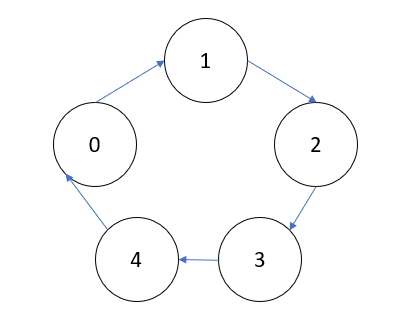  
第一步：0,1,2,3,4---->0,1,3,4(从数字2的位置再数第3个数字)  
第二步：0,1,3,4---->1,3,4(从数字0的位置再数第3个数字)  
第三步：1,3,4---->1,3(从数字4的位置再数第3个数字)   
第四步：1,3---->3(从数字1的位置再数第3个数字)    
![png](https://pic.leetcode-cn.com/9dda886441be8d249abb76e35f53f29fd6e780718d4aca2ee3c78f947fb76e75-image.png)

In [69]:
def lastRemaining(n, m):
    x = 0
    for i in range(2, n + 1):
        x = (x + m) % i
    return x


In [70]:
lastRemaining(5,3)

3

## 🗡 剑指 Offer 21. 调整数组顺序使奇数位于偶数前面  
输入一个整数数组，实现一个函数来调整该数组中数字的顺序，使得所有奇数在数组的前半部分，所有偶数在数组的后半部分。  
示例：  
 
输入：nums = [1,2,3,4]  
输出：[1,3,2,4]   
注：[3,1,2,4] 也是正确的答案之一。  

In [6]:
def exchange(nums):
    e = len(nums)-1
    s = 0
    while s<e:
        while s<e and nums[e]%2==0:
            e = e-1
        while s<e and nums[s]%2!=0:
            s = s+1
        nums[s], nums[e] = nums[e], nums[s]
    return nums


In [7]:
nums = [1,2,3,4]
exchange(nums)

[1, 3, 2, 4]

## 🗡剑指 Offer 57. 和为s的两个数字  
输入一个**递增排序**的数组和一个数字s，在数组中查找两个数，使得它们的和正好是s。如果有多对数字的和等于s，则输出任意一对即可。  
示例 1：  
输入：nums = [2,7,11,15], target = 9  
输出：[2,7] 或者 [7,2]  
示例 2：  
输入：nums = [10,26,30,31,47,60], target = 40  
输出：[10,30] 或者 [30,10]  

**解法一**：暴力查找法---->时间效率太低了，太浪费时间了  
**解法二**：建立首尾双指针，由于数组是递增排序的数组，首尾所指定的数字相加，如果数字小于目标数字说明首指针指定数字太小了，反之同理

### 暴力查找法

In [21]:
def twoSum(nums, target):
    length = len(nums)
    a= []
    for i in range(length):
        for j in range(length):
            if nums[i] + nums[j] == target:
                a.append(nums[i])
                a.append(nums[j])
                return a


In [22]:
nums = [10,26,30,31,47,60]
target = 40  

In [23]:
twoSum(nums, target)

[10, 30]

### 双指针

In [27]:
def twoSum(nums, target):
    e, s = len(nums)-1, 0
    while s<=e:
        if nums[e] + nums[s] >target:
            e = e-1
        elif nums[e] + nums[s] <target:
            s = s+1
        else:
            return nums[e], nums[s]

    

In [28]:
nums =[10,26,30,31,47,60]
target = 40
twoSum(nums, target)

(30, 10)

## 🗡剑指 Offer 47. 礼物的最大价值  
在一个m*n的棋盘的每一格都放有一个礼物，每个礼物都有一定的价值(价值大于0)。你可以从棋盘的左上角开始拿格子里的礼物，并每次向右或者向下移动一格、直到到达棋盘的右下角。给定一个棋盘及其上面的礼物的价值，请计算你最多能拿到多少价值的礼物？  
示例 1:  
输入:   
[  
  [1,3,1],  
  [1,5,1],  
  [4,2,1]  
]  
输出: 12  
解释: 路径 1→3→5→2→1 可以拿到最多价值的礼物  

In [14]:
def maxValue(grid):
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if i==0 and j==0: continue
            if i == 0: grid[i][j] += grid[i][j - 1]
            elif j==0:grid[i][j] += grid[i-1][j]
            else:grid[i][j] += max(grid[i][j-1], grid[i-1][j])
    return grid[-1][-1]

In [15]:
grid = [[1,3,1],[1,5,1], [4,2,1]] 
grid2 = [[1,2],[5,6],[1,1]]
maxValue(grid2)

13